In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]   # petal length, petal width
y = iris['target']

In [4]:
setosa_or_versicolor = (y == 0)| (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]


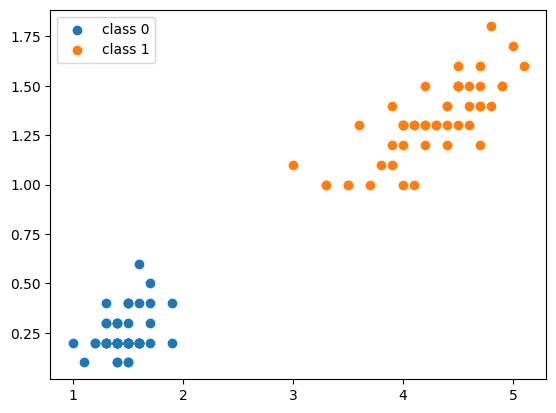

In [5]:
plt.scatter(X[:, 0][y==0],X[:,1][y==0], label='class 0')
plt.scatter(X[:, 0][y==1],X[:,1][y==1], label='class 1')
plt.legend()

In [6]:
# SVM Classifier model

svm_clf = SVC(kernel='linear', C = float(1.0)) #max c--> Hard Classifier
svm_clf.fit(X, y)

SVC(kernel='linear')

In [7]:
svm_clf.coef_     # Weight terms

array([[1.1, 0.7]])

In [8]:
svm_clf.intercept_   #bias term

array([-3.27999997])

In [9]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b=0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA',  label='Support Vector')   #heighlight Support Vectors
    plt.plot(x0, decision_boundary, 'k-', linewidth=2, label='Hyperplane')
    plt.plot(x0, gutter_up, 'k--', linewidth=2)
    plt.plot(x0, gutter_down, 'k--', linewidth=2)

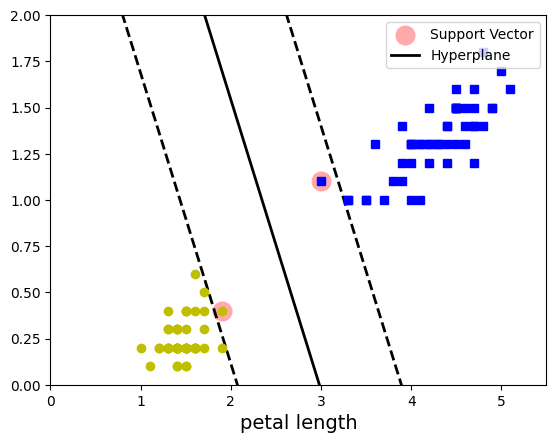

In [10]:
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs')
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo')
plt.xlabel('petal length', fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.legend()

In [11]:
svm_clf.support_vectors_


array([[1.9, 0.4],
       [3. , 1.1]])

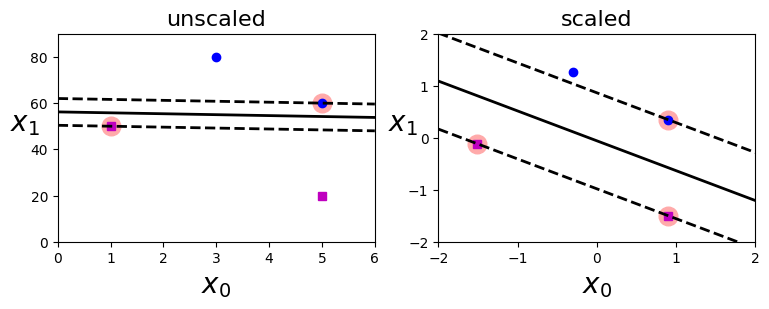

In [12]:
# Why Scaling is important

Xs= np.array([[1, 50],[5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel='linear', C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], 'bo')
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], 'ms')
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel('$x_0$', fontsize=20)
plt.ylabel('$x_1$', fontsize=20, rotation=0)
plt.title('unscaled', fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], 'bo')
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], 'ms')
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel('$x_0$', fontsize=20)
plt.ylabel('$x_1$', fontsize=20, rotation=0)
plt.title('scaled', fontsize=16)
plt.axis([-2, 2, -2, 2]);


## Non Linear Classifier

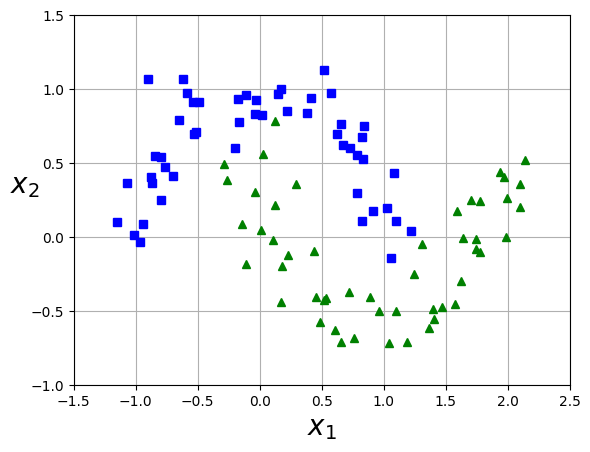

In [13]:
from sklearn.datasets import make_moons
X, y= make_moons(n_samples=100, noise=0.15, random_state=60)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'g^')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r'$x_1$', fontsize=20)
    plt.ylabel(r'$x_2$', fontsize=20, rotation=0)
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])    

## Introducing Pipeline

In [14]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5,60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

In [15]:
from sklearn.pipeline import Pipeline

In [16]:
svm_pipe = Pipeline([('scaler', StandardScaler()), ('svm_clf_pipe', SVC(kernel='linear',C=100))])

In [17]:
svm_pipe.fit(Xs, ys)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf_pipe', SVC(C=100, kernel='linear'))])

In [18]:
#Accessing Individual model
svm_pipe['svm_clf_pipe']

SVC(C=100, kernel='linear')

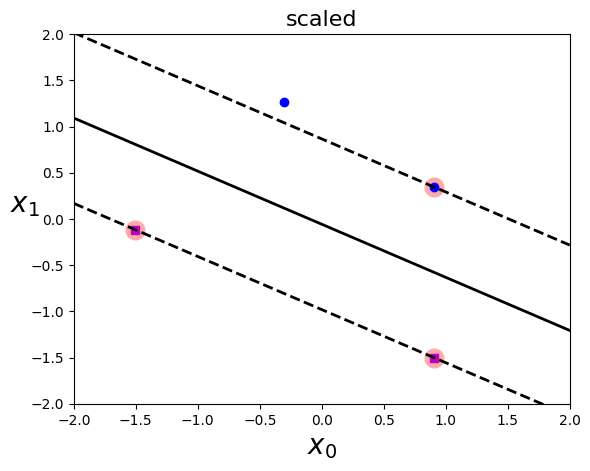

In [19]:
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], 'bo')
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], 'ms')
plot_svc_decision_boundary(svm_pipe['svm_clf_pipe'], -2, 2)
plt.xlabel('$x_0$', fontsize=20)
plt.ylabel('$x_1$', fontsize=20, rotation=0)
plt.title('scaled', fontsize=16)
plt.axis([-2, 2, -2, 2]);

## Polynomial Feaures

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
x = np.arange(1, 4).reshape(-1,1)
x

array([[1],
       [2],
       [3]])

In [22]:
pf = PolynomialFeatures(degree=2)

In [23]:
pf.fit_transform(x) #first is bias term, remaining columns are Weight terms(x, x**2) as degrees = 2


array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [24]:
pf = PolynomialFeatures(degree=3) #Degree 3
pf.fit_transform(x)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

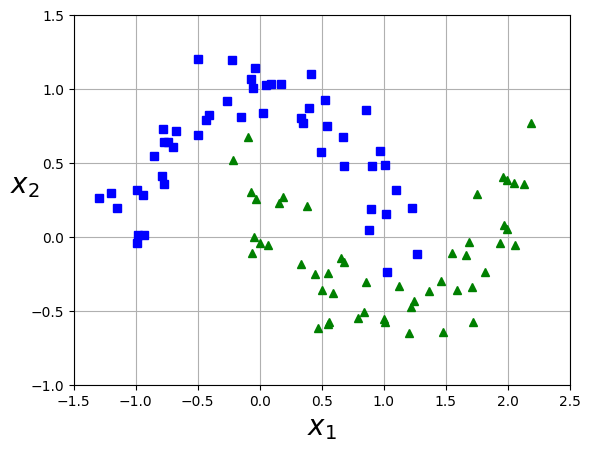

In [25]:
# Bring back non_linear classifier data

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=16)
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'g^')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r'$x_1$', fontsize=20)
    plt.ylabel(r'$x_2$', fontsize=20, rotation=0)
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])    

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

polynomial_svm_clf = Pipeline([('poly_features', PolynomialFeatures(degree=3)), 
                               ('scaler', StandardScaler()), 
                               ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

polynomial_svm_clf.fit(X, y)

C:\Users\fathi\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

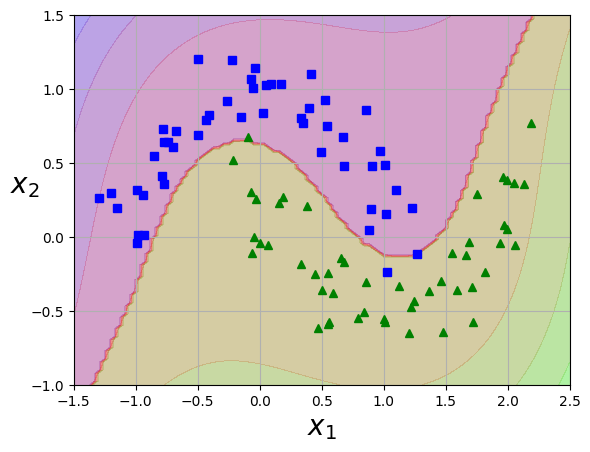

In [36]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.2)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])